### Q1. Based on your analysis of the data provided from the experiment, which of the two e-mails (A or B) would you recommend for a larger scale campaign

1.As mentioned, samples are RAMDOMLY SELECTED, in this case, samples are assumed to be random, no need for matching. 

2.Compute the conversion rate regard to each group A/B

In [5]:
import pandas
import matplotlib.pyplot as plt

In [2]:
df = pandas.read_csv("/Users/zhangyuhao/Downloads/league_email_experiment.csv")
df.head()

,user_id,email,converted,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,123456,B,0,1.307944,-0.562787,1.039630,-2.908865,-2.115263,2.694800,-0.331587,0.815707,-0.324382,0.364599
1,123457,B,0,0.910389,-0.277683,-0.670094,-0.922280,-0.315424,-1.488813,-0.067852,-0.347947,1.367260,0.623631
2,123458,A,0,-1.340762,-0.918522,0.062053,1.049362,-1.540873,-0.372487,2.011240,1.394341,-1.092356,-0.256107
3,123459,B,0,-0.342582,0.969356,0.626722,0.138985,-1.008952,-0.867862,0.305326,0.616450,0.248013,-0.001253
4,123460,A,0,-0.926935,-1.722320,-2.290512,0.511226,-0.386015,-1.395568,-1.054296,0.239869,1.349215,-1.313154


In [6]:
conversion = df.iloc[:,1:3]
conversion.head()

,email,converted
0,B,0
1,B,0
2,A,0
3,B,0
4,A,0


In [7]:
converted_val = conversion[conversion['converted']==1].groupby('email').count()
converted_val = converted_val['converted'].values.tolist()
converted_val

[37, 62]

In [8]:
total_num = conversion.groupby('email').count()
total_num = total_num['converted'].values.tolist()
total_num

[406, 594]

In [9]:
conversion[conversion['converted']==1].groupby('email').count()

,converted
email,
A,37
B,62


In [10]:
conversion_rate = [converted_val[i]/total_num[i] for i in range(len(total_num))]
conversion_rate

[0.09113300492610837, 0.10437710437710437]

In [11]:
emails = ['A','B']

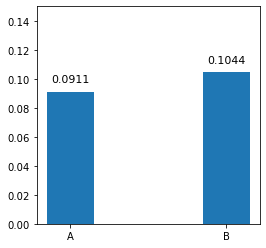

In [12]:
# draw graphs

plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.bar(emails, conversion_rate, width = 0.3)

for a,b in zip(emails,conversion_rate):  
 plt.text(a, b+0.005, '%.4f' %b, ha='center', va= 'bottom',fontsize=11)

plt.ylim(0,0.15)
plt.show()

### Answer

The conversion rate of B(0.1044) is higher than A(0.0911), B is the better choice

### Q2: In addition to the above, we’re also interested in predicting if a user will subscribe in the future based on their characteristics. Which of the ten normalized variables (X1, X2, X3...X10) are most predictive (you’re not necessarily limited to just one) of user conversion? 

1. there are 

In [13]:
data = df.iloc[:, 3:13]
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.307944,-0.562787,1.039630,-2.908865,-2.115263,2.694800,-0.331587,0.815707,-0.324382,0.364599
1,0.910389,-0.277683,-0.670094,-0.922280,-0.315424,-1.488813,-0.067852,-0.347947,1.367260,0.623631
2,-1.340762,-0.918522,0.062053,1.049362,-1.540873,-0.372487,2.011240,1.394341,-1.092356,-0.256107
3,-0.342582,0.969356,0.626722,0.138985,-1.008952,-0.867862,0.305326,0.616450,0.248013,-0.001253
4,-0.926935,-1.722320,-2.290512,0.511226,-0.386015,-1.395568,-1.054296,0.239869,1.349215,-1.313154


In [14]:
data2 = df.drop(columns = ['email', 'user_id'])
data2.head()

,converted,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0,1.307944,-0.562787,1.039630,-2.908865,-2.115263,2.694800,-0.331587,0.815707,-0.324382,0.364599
1,0,0.910389,-0.277683,-0.670094,-0.922280,-0.315424,-1.488813,-0.067852,-0.347947,1.367260,0.623631
2,0,-1.340762,-0.918522,0.062053,1.049362,-1.540873,-0.372487,2.011240,1.394341,-1.092356,-0.256107
3,0,-0.342582,0.969356,0.626722,0.138985,-1.008952,-0.867862,0.305326,0.616450,0.248013,-0.001253
4,0,-0.926935,-1.722320,-2.290512,0.511226,-0.386015,-1.395568,-1.054296,0.239869,1.349215,-1.313154


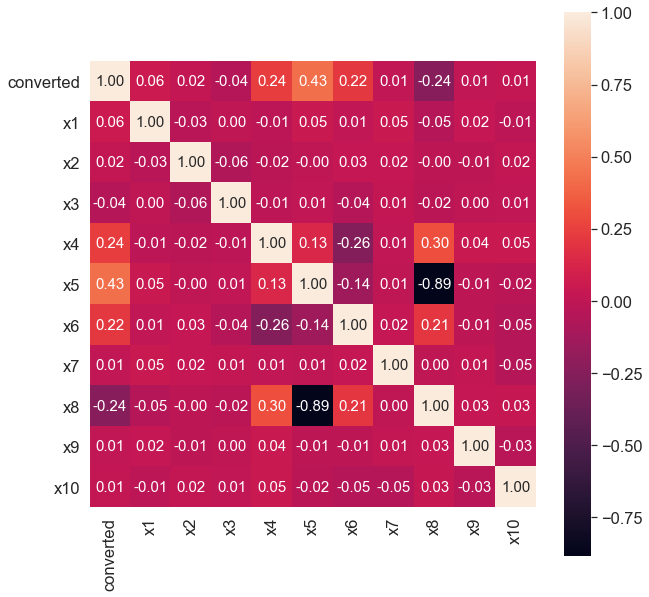

In [15]:
#correlations between features and label

import seaborn as sns
import numpy as np

cols = ['converted','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']

plt.rcParams['figure.figsize'] = (10, 10)

cm = np.corrcoef(data2.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

In [16]:
correlations = []
for label,value in enumerate(cm[0][1:]):
    correlations.append((label,abs(value)))

correlations.sort(key = lambda x:x[1], reverse = True)
correlations


[(4, 0.4283772524257131),
 (7, 0.23898478660229866),
 (3, 0.2363380249426726),
 (5, 0.2192983329414267),
 (0, 0.055150791916894704),
 (2, 0.04497423595154312),
 (1, 0.020487791244289708),
 (9, 0.01361736390545834),
 (6, 0.01137523935014729),
 (8, 0.007815613284655647)]

### Answer

As we can see, the label X4 has the closest correlation with the label Converted

There are 4 features having close correlations with the label Converted: X4, X7, X3, X5